In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 55.8 MB/s eta 0:00:00


In [5]:
import transformers

In [22]:
import pandas as pd
df = pd.read_csv('/content/df_presconf.csv')

In [23]:
csv_file_path = r'/content/df_presconf.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path, encoding='utf-8')

In [24]:
df.head()

,Unnamed: 0,date,source,full_text,title,chairman,variable,segment_text,segment
0,0,2011-04-27,fed_reserve,"April 27, 2011 Chairman Bernanke’s Press Confe...",Press Conference Transcript,Ben S. Bernanke,fomc_presconf,"April 27, 2011 Chairman Bernanke’s Press Confe...",opening_remark
1,1,2011-04-27,fed_reserve,"April 27, 2011 Chairman Bernanke’s Press Confe...",Press Conference Transcript,Ben S. Bernanke,fomc_presconf,"UNIDENTIFIED SPEAKER. Mr. Chairman, tomorrow ...",qa_pair1
2,2,2011-04-27,fed_reserve,"April 27, 2011 Chairman Bernanke’s Press Confe...",Press Conference Transcript,Ben S. Bernanke,fomc_presconf,"UNIDENTIFIED SPEAKER. Mr. Chairman, given wha...",qa_pair2
3,3,2011-04-27,fed_reserve,"April 27, 2011 Chairman Bernanke’s Press Confe...",Press Conference Transcript,Ben S. Bernanke,fomc_presconf,"UNIDENTIFIED SPEAKER. Mr. Chairman, first, th...",qa_pair3
4,4,2011-04-27,fed_reserve,"April 27, 2011 Chairman Bernanke’s Press Confe...",Press Conference Transcript,Ben S. Bernanke,fomc_presconf,"UNIDENTIFIED SPEAKER. I’m sorry, Mr. Chairman...",qa_pair4


In [26]:
all_pair=[i for i in df['segment_text']]

In [27]:
len(all_pair[:100])

100

In [28]:
#inputs = tokenizer(all_pair[:100], return_tensors="pt", padding=True, truncation=True)

In [38]:
import re

def simple_tokenize(sentence):
    # Tokenize based on whitespace and punctuation
    tokens = re.findall(r'\w+|[.,!?;]', sentence)
    return tokens

# List of sentences
sentences =all_pair

# Calculate token length for each sentence
token_lengths = [len(simple_tokenize(sentence)) for sentence in sentences]

# Total token length for the list of sentences
total_token_length = sum(token_lengths)

print("Token Lengths for Each Sentence:", token_lengths)
print("Total Token Length for the List of Sentences:", total_token_length)


Token Lengths for Each Sentence: [2009, 325, 446, 318, 244, 695, 368, 409, 552, 32, 380, 649, 297, 363, 126, 333, 387, 655, 347, 278, 640, 724, 1475, 262, 336, 595, 282, 380, 480, 512, 756, 476, 404, 282, 515, 337, 437, 419, 214, 750, 1636, 449, 221, 572, 259, 263, 312, 575, 366, 709, 314, 235, 369, 384, 519, 353, 363, 403, 373, 265, 2367, 404, 401, 523, 689, 396, 506, 625, 533, 437, 677, 405, 483, 773, 593, 391, 251, 902, 471, 800, 332, 396, 419, 354, 651, 310, 284, 430, 456, 341, 674, 377, 364, 417, 387, 400, 667, 628, 394, 926, 510, 291, 319, 299, 245, 242, 343, 257, 388, 265, 402, 608, 243, 287, 431, 472, 415, 209, 561, 298, 246, 115, 238, 1703, 189, 211, 406, 431, 399, 197, 455, 320, 352, 404, 426, 314, 536, 502, 347, 561, 556, 560, 389, 401, 376, 2182, 586, 717, 767, 589, 565, 539, 123, 866, 595, 696, 348, 474, 601, 727, 343, 334, 264, 736, 389, 631, 521, 1562, 463, 443, 454, 684, 400, 494, 249, 545, 350, 373, 374, 777, 844, 410, 260, 287, 320, 514, 526, 359, 2117, 397, 557, 369,

In [ ]:
df['token_len']=token_lengths

In [34]:
from transformers import BertForSequenceClassification, BertTokenizer, pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("ticharles/CEFR_extended")
model = AutoModelForSequenceClassification.from_pretrained("ticharles/CEFR_extended")

# Create a text classification pipeline using the fine-tuned model
classifier = pipeline('text-classification', model=model, tokenizer=tokenizer)

In [74]:
# Example usage to estimate CEFR complexity level
text_to_evaluate = all_pair[1]
result = classifier(text_to_evaluate)#
predicted_cefr_level = result[0]['label']#
print("Input Text:", text_to_evaluate)
print("Predicted CEFR Complexity Level:", predicted_cefr_level)

Input Text: UNIDENTIFIED SPEAKER.  Mr. Chairman, tomorrow we’re going to get a pretty weak first-quarter 
GDP number.  Your own projections  for the year have been downgraded in this meeting.  How—
first of all, what do you see as the causes of the weak growth to start the year, even with 
monetary easing, even with payr oll tax cuts?  And what’s behi nd this weaker forecast for 2011 
GDP?  
CHAIRMAN BERNANKE.  You’re correct.  We haven’t seen the GDP number yet.  But 
we, like most private-sector forecasters, are e xpecting a relatively weak  number for the first 
quarter, maybe something a little und er 2 percent.  Most of the f actors that account for the slower 
growth in the first quarter appear to us to be tr ansitory.  They include things like, for example, 
lower defense spending than was anticipated, wh ich will presumably be made up in a later 
quarter; weaker exports—and given the growth in the global economy, we expect to see that pick 
up again; and other factors like w ea

In [35]:
result

[{'label': 'LABEL_5', 'score': 0.8652123808860779}]

In [ ]:
#break each text into multiple parts
#and get the sentiment on each part

In [86]:
def break_sentence_into_groups(sentence, words_per_group=280):
    words = sentence.split()
    groups = [words[i:i+words_per_group] for i in range(0, len(words), words_per_group)]
    return [' '.join(group) for group in groups]

In [87]:
all_lev=[]
for i in all_pair[:]:
  resulting_groups= break_sentence_into_groups(i, words_per_group=280)

  cat=[]
  for j in resulting_groups:
    result = classifier(j)
    predicted_cefr_level = result[0]['label']
    cat.append(predicted_cefr_level)
  all_lev.append(cat)



In [84]:
(all_lev[2])

['LABEL_5', 'LABEL_5']

In [88]:
len(all_lev)

1276

In [89]:
len(all_pair)

1276

In [90]:
#add all pair to the df
df['levels']=all_lev

In [94]:
df.tail(4)

,Unnamed: 0,date,source,full_text,title,chairman,variable,segment_text,segment,token_len,levels
1272,1272,2023-05-03,fed_reserve,"May 3, 2023 Chair Powell ’s Press Conference...",Press Conference Transcript,Jerome H. Powell,fomc_presconf,"GREG ROBB. Thank you, Fed Chairman. Greg Rob...",qa_pair18,741,"[LABEL_5, LABEL_5, LABEL_5]"
1273,1273,2023-05-03,fed_reserve,"May 3, 2023 Chair Powell ’s Press Conference...",Press Conference Transcript,Jerome H. Powell,fomc_presconf,"MEGAN CAS SELLA. Hi, there. Megan Cas sella ...",qa_pair19,402,"[LABEL_5, LABEL_5]"
1274,1274,2023-05-03,fed_reserve,"May 3, 2023 Chair Powell ’s Press Conference...",Press Conference Transcript,Jerome H. Powell,fomc_presconf,"NANCY MARSHALL -GENZER. Hi, Chair Powell. Na...",qa_pair20,329,"[LABEL_5, LABEL_0]"
1275,1275,2023-06-14,fed_reserve,"June 14, 2023 Chair Powell ’s Press Conferen...",Press Conference Transcript,Jerome H. Powell,fomc_presconf,"June 14, 2023 Chair Powell ’s Press Conferen...",opening_remark,1593,"[LABEL_5, LABEL_5, LABEL_5, LABEL_5, LABEL_5, ..."


In [ ]:
#plot
# for each ques/ans pair, make a chart whose x axis denotes one pair and the y axis denotes the number of levels
#and the frequency of each level for a sigle pair

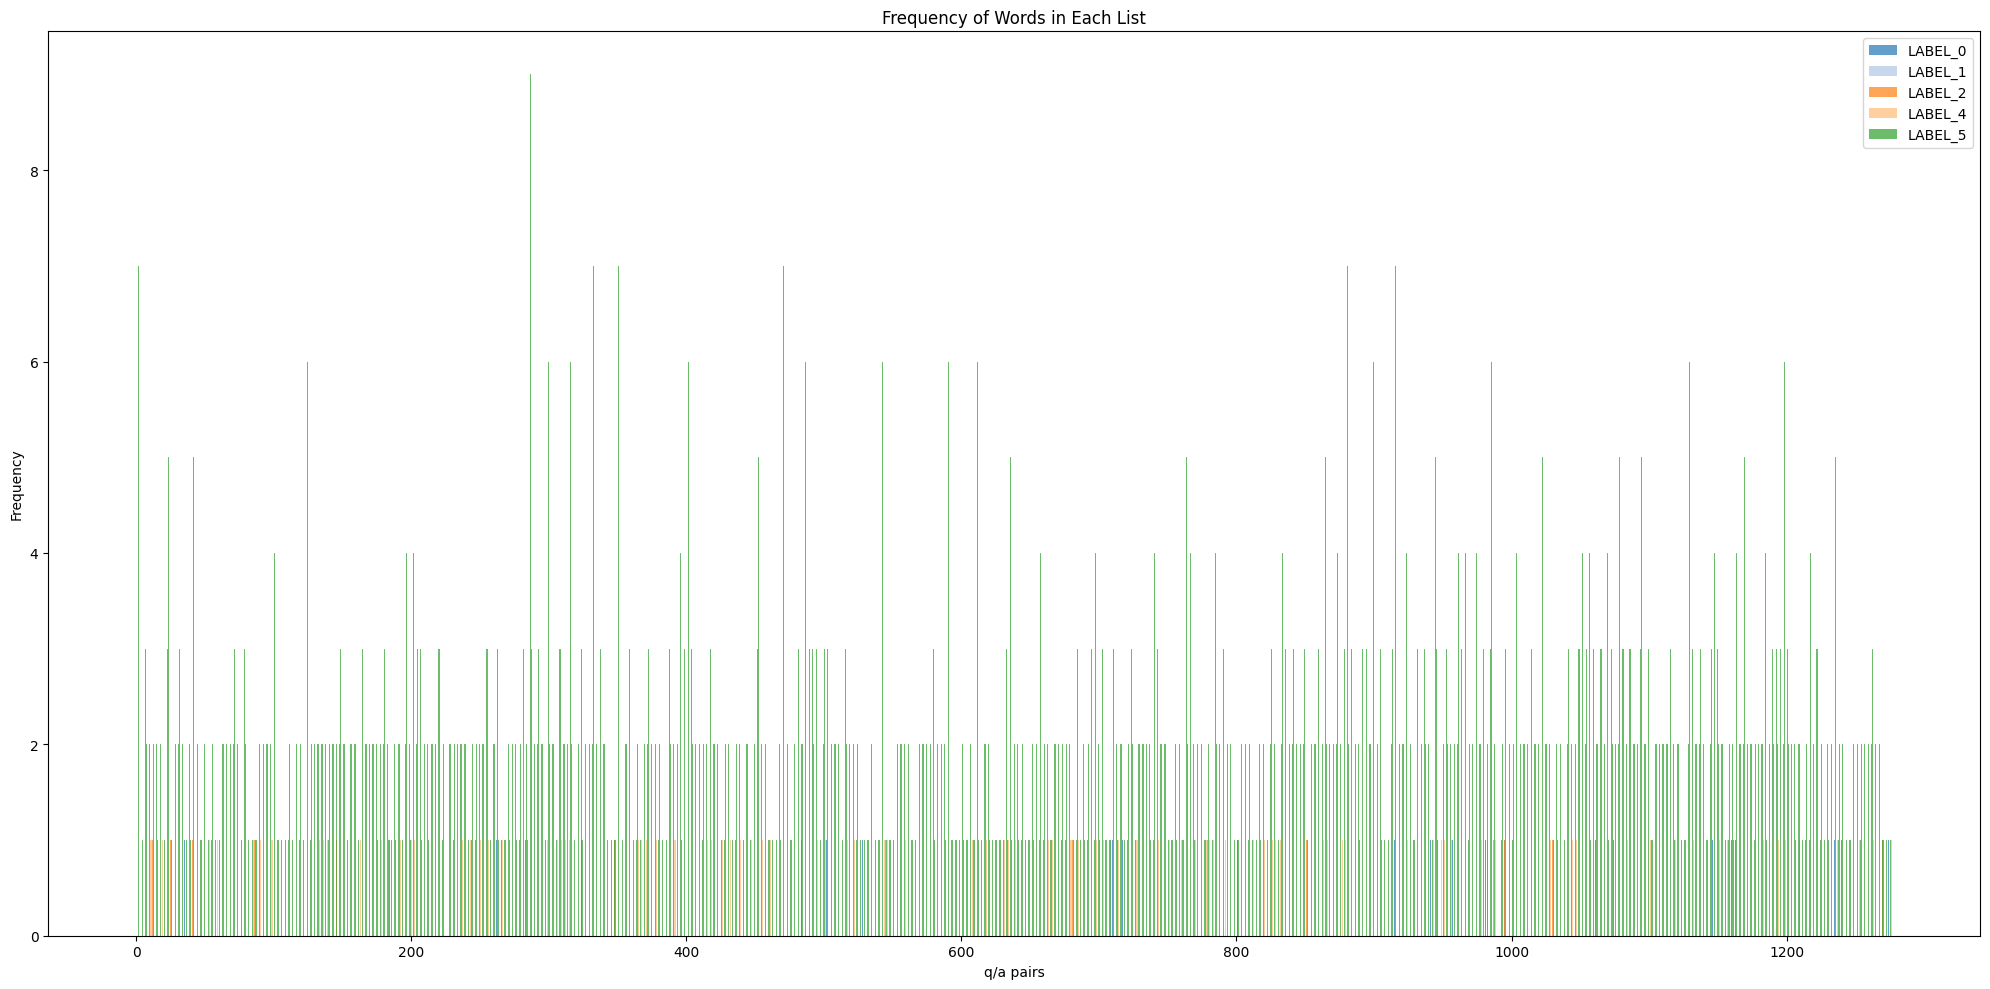

In [100]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace this with your actual data)
list_of_lists = all_lev
# Get a list of unique words in the entire list of lists
unique_words = sorted(set(word for sublist in list_of_lists for word in sublist))

# Create a dictionary to store the word frequencies for each list
word_frequencies = {word: [0] * len(list_of_lists) for word in unique_words}

# Calculate the frequency of each word in each list
for i, word_list in enumerate(list_of_lists):
    for word in word_list:
        word_frequencies[word][i] += 1

# Plot the grouped bar chart
plt.figure(figsize=(20, 10))
x = np.arange(len(list_of_lists))
width = 0.40

colors = plt.cm.tab20.colors
for i, word in enumerate(unique_words):
    plt.bar(x + i * width, word_frequencies[word], width=width, label=word, color=colors[i], alpha=0.7)

plt.xlabel("q/a pairs")
plt.ylabel("Frequency")
plt.title("Frequency of Words in Each List")
#plt.xticks(x + 2 * width, [f"Data Point {i+1}" for i in range(len(list_of_lists))], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


In [12]:
# import torch
# from transformers import AutoModelForSequenceClassification, AutoTokenizer

# # Step 1: Load the pre-trained BERT model and tokenizer
# model_name = 'bert-base-uncased'
# model = AutoModelForSequenceClassification.from_pretrained(model_name)
# tokenizer = AutoTokenizer.from_pretrained(model_name)

# # Step 2: Function to estimate CEFR complexity level
# def estimate_cefr_complexity(text):
#     # Step 3: Tokenize the text
#     inputs = tokenizer(text, return_tensors="pt")

#     # Step 4: Make predictions
#     with torch.no_grad():
#         outputs = model(**inputs)

#     # Step 5: Interpret the results
#     probabilities = outputs.logits.softmax(dim=1)
#     cefr_levels = ['A1', 'A2', 'B1', 'B2', 'C1', 'C2']
#     predicted_cefr_index = probabilities.argmax(dim=1).item()
#     predicted_cefr_level = cefr_levels[predicted_cefr_index]

#     return predicted_cefr_level

# # Step 6: Example usage
# text_to_evaluate = "Over the intermeeting period, foreign financial markets were volatile as investors' focus shifted from resilience in economic activity and stubbornly high core inflation across advanced economies earlier in the period to stresses in the global banking sector more recently. Earlier in the period, yields and market-based measures of inflation expectations in the AFEs increased notably, driven by spillovers from U.S. Treasury yields as well as upside surprises in economic and inflation data for AFEs. Later in the period, developments in the banking sector led to large declines in advanced-economy yields, and, on net, AFE yields declined slightly. Additionally, for the intermeeting period overall, the staff's dollar index rose moderately, corporate and emerging market economy sovereign credit spreads widened, and foreign equity indexes generally moved lower, with bank equities falling notably.U.S. unsecured funding markets showed some signs of pressure later in the intermeeting period. Issuance of commercial paper (CP) and negotiable certificates of deposit (NCDs) dropped a touch over the entire period, and the fraction of CP issuance with overnight maturities increased but remained within normal ranges. Spreads of term CP and NCDs widened some, and spreads for issuers with lower credit ratings rose more, but other unsecured spreads remained within normal ranges. Prime MMFs experienced outflows, while government MMFs had inflows.."
# predicted_cefr_level = estimate_cefr_complexity(text_to_evaluate)

# print("Input Text:", text_to_evaluate)
# print("Predicted CEFR Complexity Level:", predicted_cefr_level)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Input Text: Over the intermeeting period, foreign financial markets were volatile as investors' focus shifted from resilience in economic activity and stubbornly high core inflation across advanced economies earlier in the period to stresses in the global banking sector more recently. Earlier in the period, yields and market-based measures of inflation expectations in the AFEs increased notably, driven by spillovers from U.S. Treasury yields as well as upside surprises in economic and inflation data for AFEs. Later in the period, developments in the banking sector led to large declines in advanced-economy yields, and, on net, AFE yields declined slightly. Additionally, for the intermeeting period overall, the staff's dollar index rose moderately, corporate and emerging market economy sovereign credit spreads widened, and foreign equity indexes generally moved lower, with bank equities falling notably.U.S. unsecured funding markets showed some signs of pressure later in the intermeeting